In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

## Exploratory Data Analysis

In [2]:
# Read the dataset

data = pd.read_csv("Leads.csv")
data.shape

(9240, 37)

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
(data.isnull().sum()/len(data))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Dropping all columns where null value > 40%

In [8]:
drop=["Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"]

In [9]:
data = data.drop(drop,axis=1)

In [10]:
data.shape

(9240, 32)

In [11]:
(data.isnull().sum()/len(data))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
for col in data.columns:
    print(col+"\n")
    print(data[col].value_counts())
    print("*"*100)

Prospect ID

f8424752-73ca-49a4-998b-01c0defa0fe5    1
59e989b8-8d43-48be-90cd-1d779e7fe2be    1
33646db8-50d2-4b90-b953-64210b3d237d    1
aef6dfa8-a12c-432e-b29a-85bb2dd4a19d    1
dc54ef9a-7537-41d1-9601-786703449981    1
                                       ..
20222cb2-a71f-469b-8269-672f358ef3de    1
63ebde80-a465-4cdc-ab5a-5e880a7138b0    1
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
f61c3ec9-4807-4ba5-9d90-3aab7005e070    1
31f2daeb-915e-4fb6-bff8-10824628b3a5    1
Name: Prospect ID, Length: 9240, dtype: int64
****************************************************************************************************
Lead Number

608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
****************************************************************************************************
Lead Origin

Landing Page Submission    4886
API                        3580
Lead Add 

In [13]:
select =["Specialization","How did you hear about X Education","Lead Profile","City"] ## these columns has a value called 'Select' which is same as null value

In [14]:
data = data.replace("Select",np.nan)

In [15]:
(data.isnull().sum()/len(data))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [16]:
data.shape

(9240, 32)

In [17]:
## Dropping "How did you hear about X Education ,Lead Profile ,City "

In [18]:
data = data.drop(["How did you hear about X Education" ,"Lead Profile" ,"City"],axis=1)

In [19]:
(data.isnull().sum()/len(data))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [20]:
data.shape

(9240, 29)

In [21]:
#### By checking value_counts of the columns we could see that there are certain columns for which the majority(97-99%) is a single value
#### Since having a single value in a column is of not much use for prediction dropping all those columns

In [22]:
 majority_columns = ["Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","I agree to pay the amount through cheque","Get updates on DM Content","What matters most to you in choosing a course","Update me on Supply Chain Content"]

In [23]:
data = data.drop(majority_columns,axis = 1)

In [24]:
data.shape

(9240, 16)

In [25]:
(data["Country"].value_counts()/len(data["Country"]))*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Germany                  0.043290
Kuwait                   0.043290
South Africa             0.043290
Nigeria                  0.043290
Canada                   0.043290
Sweden                   0.032468
Ghana                    0.021645
Uganda                   0.021645
Philippines              0.021645
Netherlands              0.021645
Belgium                  0.021645
Bangladesh               0.021645
Asia/Pacific Region      0.021645
Italy                    0.021645
China                    0.021645
Indonesia                0.010823
Denmark       

In [26]:
## Dropping Country column since majority of the data is from one Country

In [27]:
data = data.drop("Country",axis=1)

In [28]:
data.shape

(9240, 15)

In [29]:
(data.isnull().sum()/len(data))*100

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            36.580087
What is your current occupation           29.112554
Tags                                      36.287879
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

## Drop all the rows with null values

In [30]:
data = data.drop("Tags",axis=1)

In [31]:
(data.isnull().sum())

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [32]:
data.shape

(9240, 14)

In [33]:
data = data.dropna()

In [34]:
data.shape

(4535, 14)

#### Removing Lead Number and Prospect ID  which is of no use for analysis

In [35]:
data.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4535 entries, 2 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             4535 non-null   object 
 1   Lead Source                             4535 non-null   object 
 2   Do Not Email                            4535 non-null   object 
 3   Converted                               4535 non-null   int64  
 4   TotalVisits                             4535 non-null   float64
 5   Total Time Spent on Website             4535 non-null   int64  
 6   Page Views Per Visit                    4535 non-null   float64
 7   Last Activity                           4535 non-null   object 
 8   Specialization                          4535 non-null   object 
 9   What is your current occupation         4535 non-null   object 
 10  A free copy of Mastering The Interview  4535 non-null   obje

### VISUALISATION

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

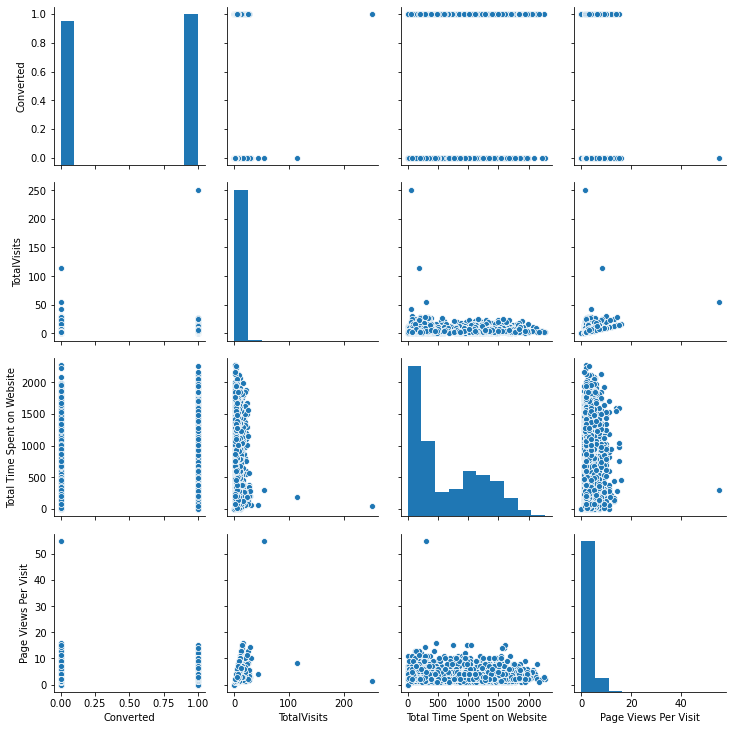

In [40]:
sns.pairplot(data,vars = ["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"])
plt.show()

#### UNIVARIATE ANALYSIS

In [41]:
categorical = ["Lead Source","Do Not Email","Last Activity","Specialization","What is your current occupation","A free copy of Mastering The Interview","Last Notable Activity"]
numerical = ["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

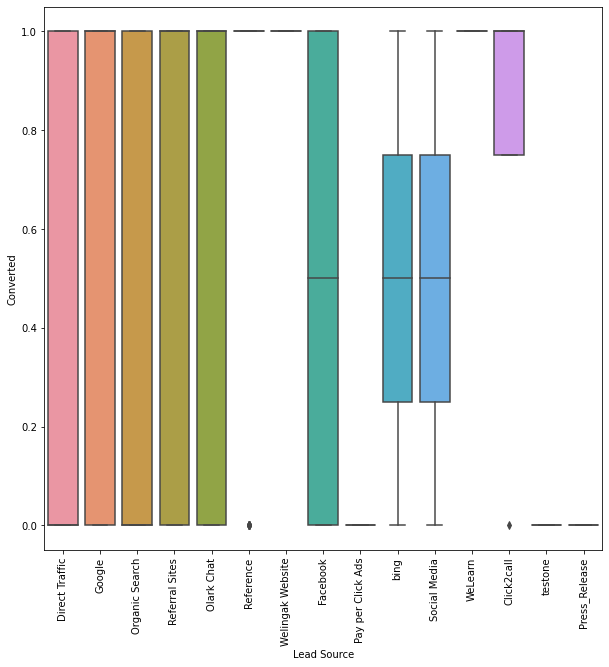

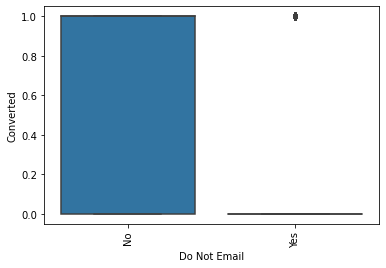

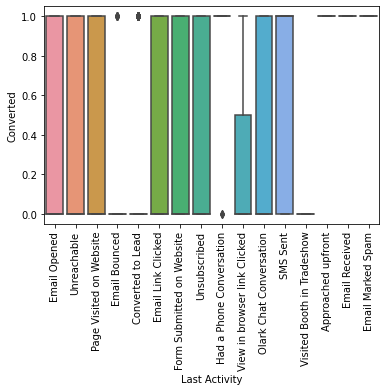

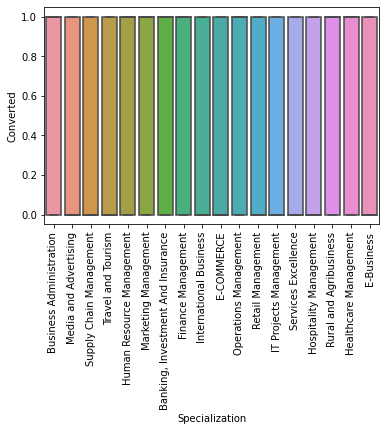

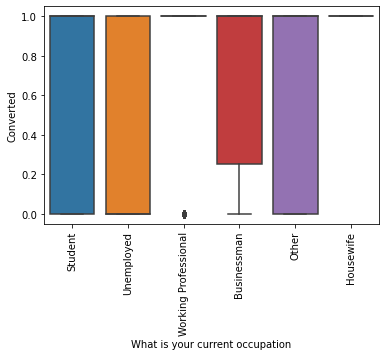

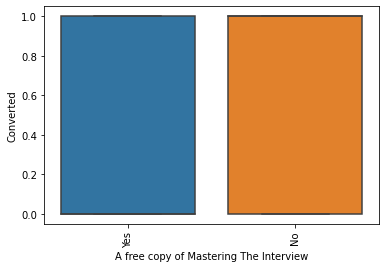

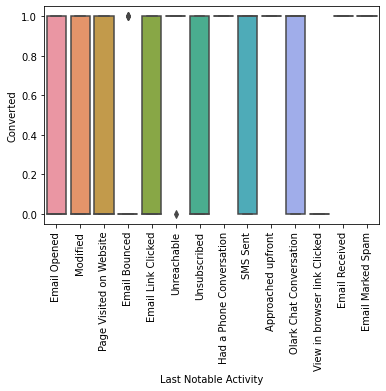

In [44]:
##categorical variables
plt.figure(figsize=(10,10))
for c in categorical:
    
    sns.boxplot(x=c,y="Converted",data=data)
    plt.xticks(rotation=90)
    plt.show()

Direct Traffic       1790
Google               1504
Organic Search        623
Reference             332
Olark Chat            217
Referral Sites         28
Welingak Website       15
Facebook               14
Click2call              4
Social Media            2
bing                    2
testone                 1
WeLearn                 1
Pay per Click Ads       1
Press_Release           1
Name: Lead Source, dtype: int64


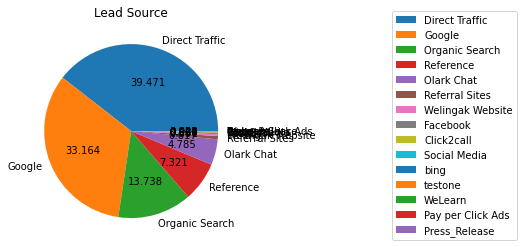

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


No     4204
Yes     331
Name: Do Not Email, dtype: int64


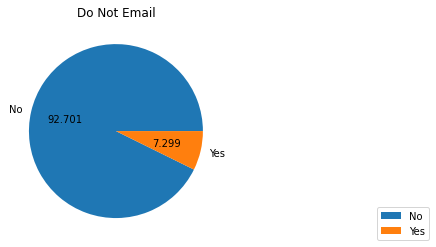

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Email Opened                    1810
SMS Sent                        1601
Page Visited on Website          352
Converted to Lead                211
Email Bounced                    125
Email Link Clicked               124
Olark Chat Conversation          111
Form Submitted on Website         81
Unreachable                       57
Unsubscribed                      33
Had a Phone Conversation          19
Approached upfront                 3
View in browser link Clicked       3
Email Marked Spa

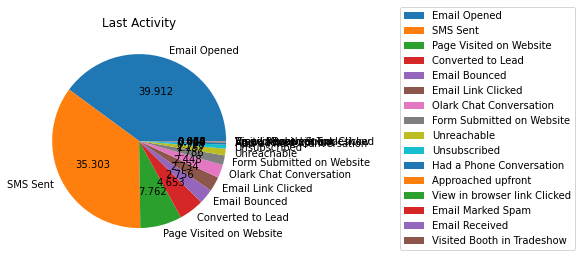

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Finance Management                   745
Human Resource Management            665
Marketing Management                 663
Operations Management                391
Business Administration              310
IT Projects Management               278
Supply Chain Management              275
Banking, Investment And Insurance    266
Media and Advertising                161
Travel and Tourism                   149
International Business               136
Healthcare Management                122
Hospi

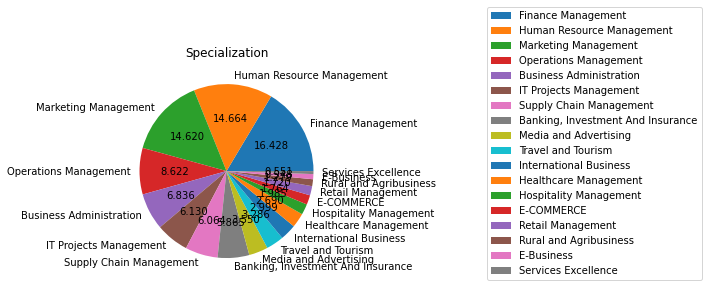

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Unemployed              3738
Working Professional     647
Student                  121
Other                     14
Housewife                  9
Businessman                6
Name: What is your current occupation, dtype: int64


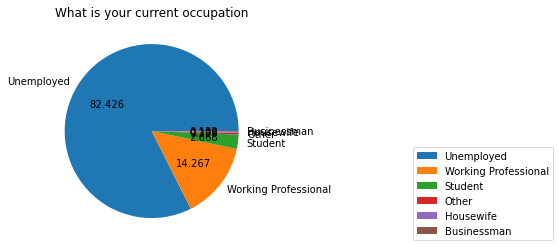

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


No     2368
Yes    2167
Name: A free copy of Mastering The Interview, dtype: int64


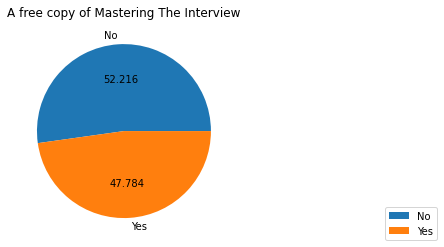

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Email Opened                    1531
SMS Sent                        1375
Modified                        1261
Page Visited on Website          176
Email Link Clicked                81
Unsubscribed                      26
Email Bounced                     26
Olark Chat Conversation           23
Unreachable                       19
Had a Phone Conversation          12
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received  

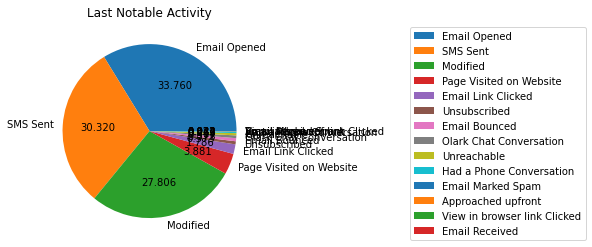

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [45]:
for col in categorical :
    plt.title(col)
    print(data[col].value_counts())
    data[col].value_counts().plot.pie(autopct='%0.3f')
    plt.ylabel("")
    plt.legend(loc=(1.7,0))
    plt.show()
    print("-"*500)
    print("\n")

#### BIVARIATE ANALYSIS

In [46]:
# we will analyse the variables with the "Converted" column

[]

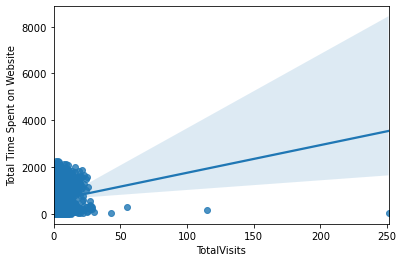

In [50]:
numerical = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
sns.regplot(data=data,x="TotalVisits",y="Total Time Spent on Website")
plt.plot()


[]

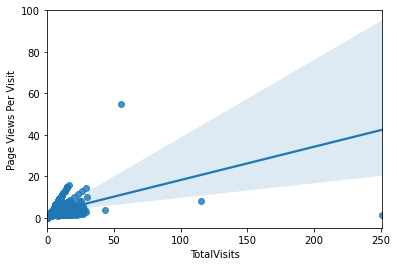

In [51]:
sns.regplot(data=data,x="TotalVisits",y="Page Views Per Visit")
plt.plot()

[]

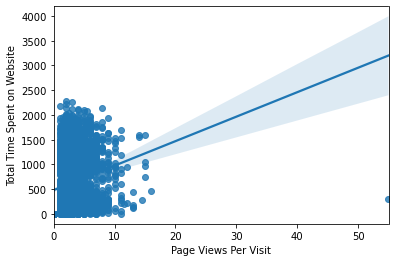

In [52]:
sns.regplot(data=data,x="Page Views Per Visit",y="Total Time Spent on Website")
plt.plot()

### HEATMAP

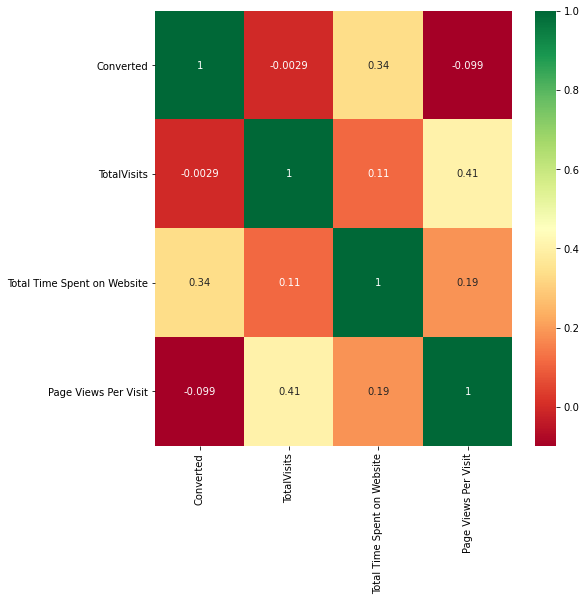

In [54]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

## Replace yes ,no columns with 0 and 1

In [38]:
data.describe().columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [39]:
categorical = [x for x in data.columns if x not in data.describe().columns]

In [40]:
categorical

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [41]:
for x in categorical:
    print(x)
    print(data[x].value_counts())
    print("*"*100)

Lead Origin
Landing Page Submission    3564
API                         604
Lead Add Form               353
Lead Import                  14
Name: Lead Origin, dtype: int64
****************************************************************************************************
Lead Source
Direct Traffic       1790
Google               1504
Organic Search        623
Reference             332
Olark Chat            217
Referral Sites         28
Welingak Website       15
Facebook               14
Click2call              4
bing                    2
Social Media            2
Press_Release           1
WeLearn                 1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
****************************************************************************************************
Do Not Email
No     4204
Yes     331
Name: Do Not Email, dtype: int64
****************************************************************************************************
Last Activity
Email O

#### Changing the columns "Do Not Email" and "A free copy of Mastering The Interview" to "0 and 1" values

In [42]:
def value_map(col):
    return col.map({"Yes":1,"No":0})

cols = ["Do Not Email","A free copy of Mastering The Interview"]

data[cols] = data[cols].apply(value_map)

In [43]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,0,Modified
6,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,0,Modified
10,Landing Page Submission,Organic Search,0,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,1,Email Opened
11,Landing Page Submission,Direct Traffic,0,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,1,Page Visited on Website


In [44]:
data.shape

(4535, 12)

In [45]:
categorical

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

## Dummy Variables

In [46]:
dummy = pd.get_dummies(data[["Lead Origin",
 "Lead Source",
 "Last Activity",
 "Specialization",
 "What is your current occupation",
 "Last Notable Activity"]],drop_first=True)

In [47]:
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
#### adding dummy df to original df

In [49]:
data = pd.concat([data,dummy],axis=1)

In [50]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,...,0,0,0,1,0,0,0,0,0,0
10,Landing Page Submission,Organic Search,0,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,...,1,0,0,0,0,0,0,0,0,0
11,Landing Page Submission,Direct Traffic,0,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,...,0,0,0,0,0,1,0,0,0,0


In [51]:
data.shape

(4535, 79)

In [52]:
### dropping repeated categorical columns

In [53]:
data.drop(categorical,axis=1,inplace=True)

In [54]:
data.shape

(4535, 71)

In [55]:
data = data.reset_index()

In [56]:
data.head()

,index,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,2,1,2.0,1532,2.00,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,3,0,1.0,305,1.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,6,1,2.0,1640,2.00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,10,1,8.0,1351,8.00,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,11,1,8.0,1343,2.67,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
data.shape

(4535, 72)

In [58]:
data.drop("index",axis=1,inplace=True)

In [59]:
data.shape

(4535, 71)

In [60]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,2.0,1532,2.00,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1640,2.00,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,8.0,1351,8.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,8.0,1343,2.67,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Check correlation

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

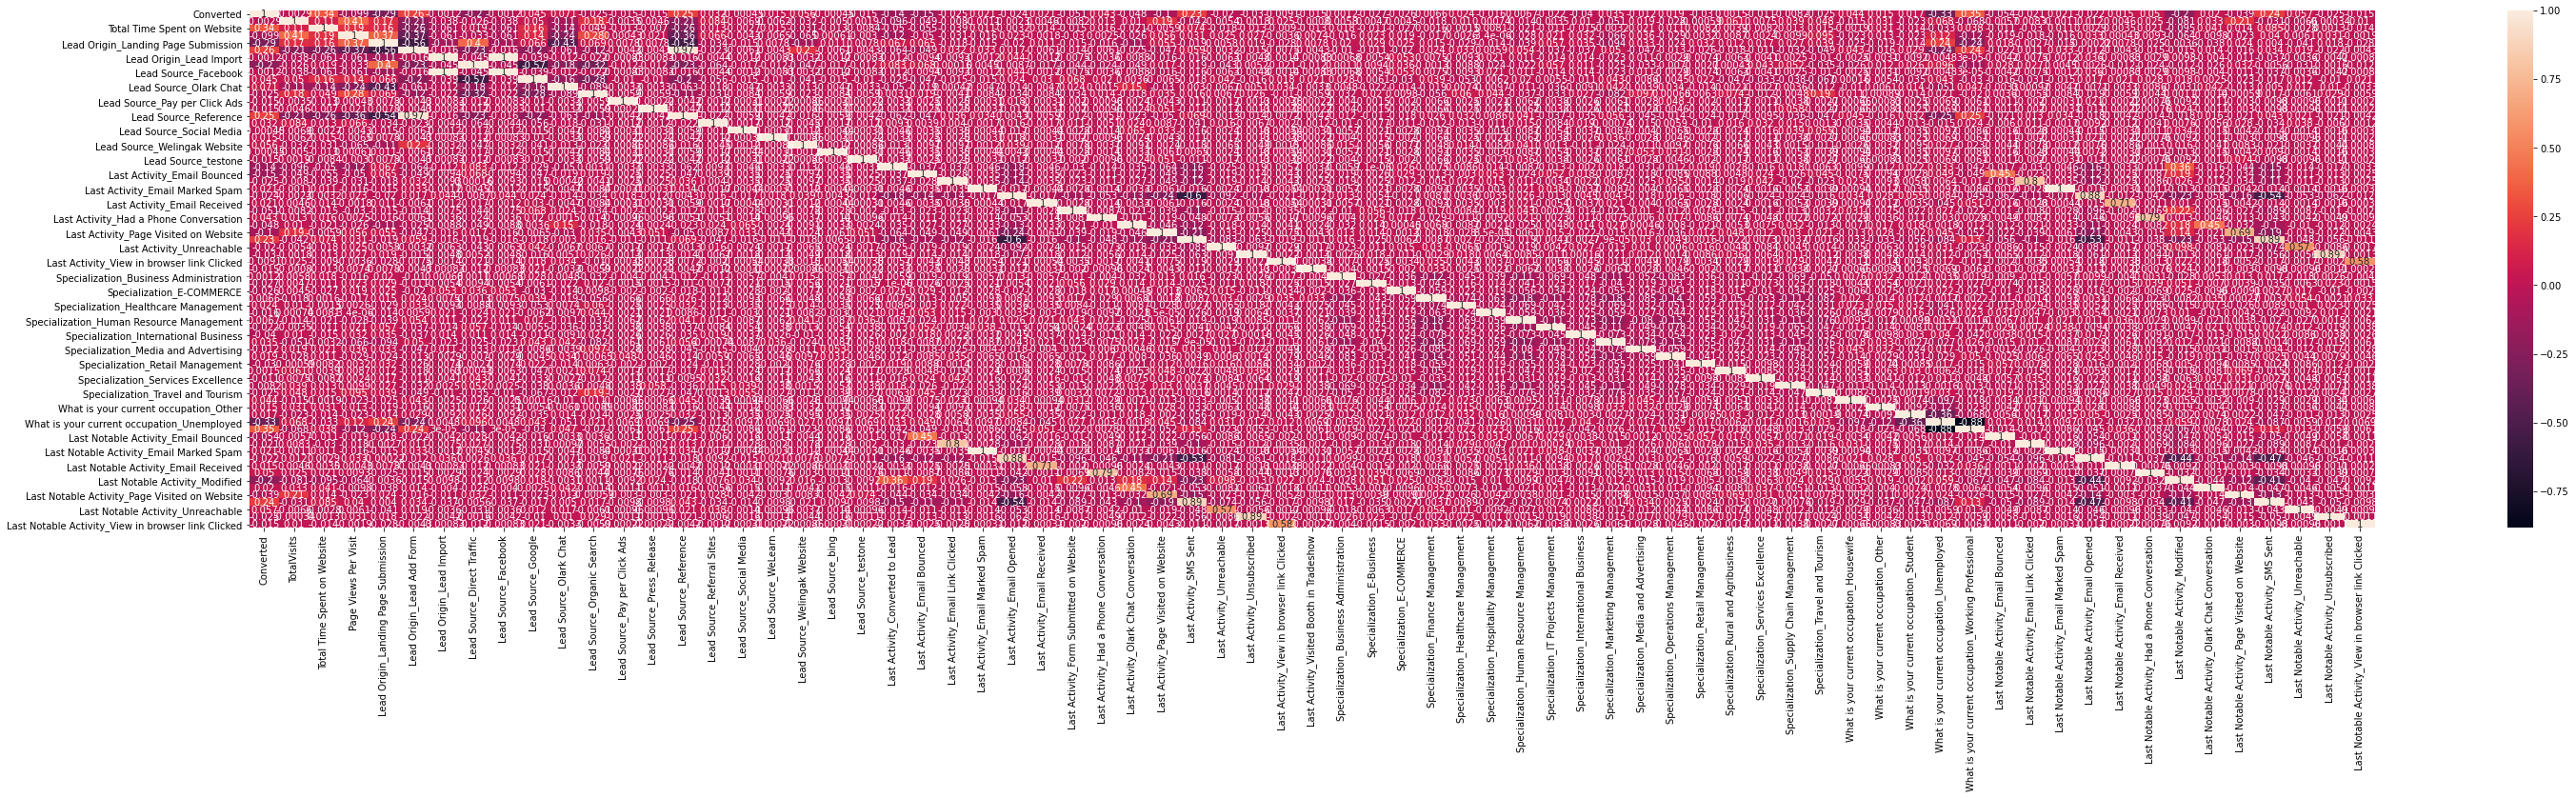

In [63]:
plt.figure(figsize=(50,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [64]:
pd.set_option('display.max_columns',None)

In [65]:
corr = data.corr()

In [66]:
corr=corr[corr>0.8]

In [67]:
corr=corr[corr<1]

In [68]:
corr.dropna(axis=1,how='all').dropna(axis=0,how = 'all')

,Lead Origin_Lead Add Form,Lead Source_Reference,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
Lead Origin_Lead Add Form,NaN,0.967373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead Source_Reference,0.967373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Activity_Email Link Clicked,NaN,NaN,NaN,NaN,NaN,NaN,0.804313,NaN,NaN,NaN
Last Activity_Email Opened,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875955,NaN,NaN
Last Activity_SMS Sent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.892981,NaN
Last Activity_Unsubscribed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886936
Last Notable Activity_Email Link Clicked,NaN,NaN,0.804313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Notable Activity_Email Opened,NaN,NaN,NaN,0.875955,NaN,NaN,NaN,NaN,NaN,NaN
Last Notable Activity_SMS Sent,NaN,NaN,NaN,NaN,0.892981,NaN,NaN,NaN,NaN,NaN
Last Notable Activity_Unsubscribed,NaN,NaN,NaN,NaN,NaN,0.886936,NaN,NaN,NaN,NaN


In [69]:
##  Lead Origin_Lead Add Form	 and Lead Source_Reference = 0.967373
##  Last Activity_SMS Sent  and Last Notable Activity_SMS Sent = 0.892981	
##  Last Notable Activity_Unsubscribed	 and  Last Activity_Unsubscribed = 0.886936	
##  Last Notable Activity_Email Opened	 and  Last Activity_Email Opened =  0.875955	

In [70]:
### These are highly correlated columns , so dropping any one from each of the 4 pairs

In [71]:
data = data.drop(["Lead Origin_Lead Add Form","Last Notable Activity_SMS Sent","Last Notable Activity_Unsubscribed","Last Notable Activity_Email Opened"],axis=1)

In [72]:
data.shape

(4535, 67)

## Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x = data.drop("Converted",axis=1)

In [75]:
x.shape

(4535, 66)

In [76]:
y = data["Converted"]

In [77]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Converted, dtype: int64

In [78]:
#### splitting the data

In [79]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 100)

In [80]:
X_train.shape

(3174, 66)

In [81]:
X_test.shape

(1361, 66)

In [82]:
y_train.shape

(3174,)

In [83]:
y_test.shape

(1361,)

In [84]:
data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
count,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000
mean,0.510695,4.293716,626.625358,2.937385,0.785888,0.003087,0.394708,0.003087,0.331643,0.047850,0.137376,0.000221,0.000221,0.073208,0.006174,0.000441,0.000221,0.003308,0.000441,0.000221,0.046527,0.027563,0.027343,0.000441,0.399118,0.000441,0.017861,0.004190,0.024476,0.077619,0.353032,0.012569,0.007277,0.000662,0.000221,0.068357,0.009482,0.017641,0.164278,0.026902,0.019846,0.146637,0.061301,0.029989,0.146196,0.035502,0.086218,0.017200,0.012789,0.005513,0.060639,0.032856,0.001985,0.003087,0.026681,0.824256,0.142668,0.005733,0.017861,0.000441,0.000221,0.002646,0.278060,0.005072,0.038809,0.004190,0.000221
std,0.499941,5.451975,568.094959,2.143495,0.410250,0.055482,0.488842,0.055482,0.470855,0.213472,0.344282,0.014849,0.014849,0.260507,0.078342,0.020998,0.014849,0.057423,0.020998,0.014849,0.210647,0.163736,0.163099,0.020998,0.489771,0.020998,0.132461,0.064599,0.154540,0.267600,0.477965,0.111417,0.085002,0.025714,0.014849,0.252386,0.096923,0.131656,0.370568,0.161815,0.139485,0.353783,0.23

### Feature Scaling

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

<ipython-input-86-3448244ec33a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-86-3448244ec33a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
883,0.055777,0.119159,0.127273,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2359,0.019920,0.005607,0.030364,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3647,0.015936,0.014019,0.072727,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2415,0.023904,0.073832,0.054545,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4228,0.043825,0.088785,0.066727,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [87]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
4164,0.007968,0.015421,0.036364,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
353,0.011952,0.193925,0.054545,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
647,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4176,0.015936,0.109346,0.072727,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
564,0.019920,0.137383,0.090909,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Model Building

#### RFE

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [89]:
from sklearn.feature_selection import RFE
rfe= RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [90]:
rfe.support_

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True, False, False, False,  True, False, False,
       False,  True, False])

In [91]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', False, 42),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Pay per Click Ads', False, 20),
 ('Lead Source_Press_Release', False, 22),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_WeLearn', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 45),
 ('Lead Source_testone', False, 21),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Marked Spam', False, 33),
 ('Last Activity_Email Opened', False, 26),
 ('La

In [92]:
col=X_train.columns[rfe.support_]

In [93]:
col.shape

(15,)

In [94]:
X_train = X_train[col]
X_test = X_test[col]

## Model 1

In [95]:
import statsmodels.api as sm

In [96]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [97]:

logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res1=logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3158
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1439.3
Date:                Mon, 27 May 2024   Deviance:                       2878.6
Time:                        19:38:06   Pearson chi2:                 3.86e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0453      0.276      0.165      0.869      -0.495       0.585
TotalVisits                                             11.7385      3.554      3.303      0.001       4.774      18.704
Total Time Spent on Website                              4.0645      0.195     20.891      0.000       3.683       4.446
Page Views Per Visit                                    -5.0062      1.578     -3.173      0.002      -8.098      -1.914
Lead Origin_Landing Page Submission                     -1.2594      0.146     -8.609      0.000      -1.546      -0.973
Lead Source_Reference                                    2.7501      0.362      7.606      0.000       2.041       3.459
Lead Source_Welingak Website                            23.7271   2.52e+04      0.001      0.999   -4.95e+04    4.95e+04
Last Activity_Converted to Lead                         -1.3566      0.288     -4.714      0.000      -1.921      -0.793
Last Activity_Email Bounced                             -3.5496      1.033     -3.438      0.001      -5.573      -1.526
Last Activity_SMS Sent                                   0.9870      0.099      9.930      0.000       0.792       1.182
What is your current occupation_Housewife               23.0996   2.75e+04      0.001      0.999   -5.38e+04    5.38e+04
What is your current occupation_Unemployed              -0.7759      0.246     -3.148      0.002      -1.259      -0.293
What is your current occupation_Working Professional     1.9909      0.318      6.255      0.000       1.367       2.615
Last Notable Activity_Email Bounced                      2.6130      1.202      2.175      0.030       0.258       4.968
Last Notable Activity_Had a Phone Conversation          23.7564   2.26e+04      0.001      0.999   -4.43e+04    4.43e+04
Last Notable Activity_Unreachable                        2.9401      1.112      2.644      0.008       0.761       5.119
========================================================================================================================
"""

### Here p value of three columns Lead Source_Welingak Website,What is your current occupation_Housewife,Last Notable Activity_Had a Phone Conversation are same and highest 

### Checking VIF also

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]

In [99]:
vif_data

,Feature,VIF
0,const,39.949500
1,TotalVisits,1.176269
2,Total Time Spent on Website,1.110630
3,Page Views Per Visit,1.387172
4,Lead Origin_Landing Page Submission,1.549976
5,Lead Source_Reference,1.573481
6,Lead Source_Welingak Website,1.024338
7,Last Activity_Converted to Lead,1.064330
8,Last Activity_Email Bounced,1.304276
9,Last Activity_SMS Sent,1.077507


### Here the VIF for all are below cutoff which is 5%

#### So dropping one of the column with high p value "Last Notable Activity_Had a Phone Conversation"

In [100]:
X_train_sm=X_train_sm.drop("Last Notable Activity_Had a Phone Conversation",axis=1)
X_test_sm=X_test_sm.drop("Last Notable Activity_Had a Phone Conversation",axis=1)

## Model 2

In [101]:

logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res2=logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3159
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1444.9
Date:                Mon, 27 May 2024   Deviance:                       2889.7
Time:                        19:38:56   Pearson chi2:                 3.86e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0502      0.275      0.182      0.855      -0.489       0.590
TotalVisits                                             11.8317      3.554      3.329      0.001       4.866      18.797
Total Time Spent on Website                              4.0507      0.194     20.877      0.000       3.670       4.431
Page Views Per Visit                                    -4.8303      1.570     -3.076      0.002      -7.908      -1.753
Lead Origin_Landing Page Submission                     -1.2723      0.146     -8.724      0.000      -1.558      -0.986
Lead Source_Reference                                    2.7386      0.361      7.579      0.000       2.030       3.447
Lead Source_Welingak Website                            22.7146   1.53e+04      0.001      0.999      -3e+04       3e+04
Last Activity_Converted to Lead                         -1.3603      0.288     -4.729      0.000      -1.924      -0.796
Last Activity_Email Bounced                             -3.5545      1.032     -3.443      0.001      -5.578      -1.531
Last Activity_SMS Sent                                   0.9755      0.099      9.833      0.000       0.781       1.170
What is your current occupation_Housewife               22.1009   1.66e+04      0.001      0.999   -3.26e+04    3.26e+04
What is your current occupation_Unemployed              -0.7657      0.246     -3.109      0.002      -1.248      -0.283
What is your current occupation_Working Professional     1.9931      0.318      6.264      0.000       1.369       2.617
Last Notable Activity_Email Bounced                      2.6093      1.202      2.171      0.030       0.254       4.965
Last Notable Activity_Unreachable                        2.9273      1.112      2.632      0.008       0.748       5.107
========================================================================================================================
"""

In [102]:

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]

In [103]:
vif_data

,Feature,VIF
0,const,39.934613
1,TotalVisits,1.176203
2,Total Time Spent on Website,1.110132
3,Page Views Per Visit,1.386693
4,Lead Origin_Landing Page Submission,1.543822
5,Lead Source_Reference,1.572113
6,Lead Source_Welingak Website,1.024254
7,Last Activity_Converted to Lead,1.064231
8,Last Activity_Email Bounced,1.304213
9,Last Activity_SMS Sent,1.075910


### Dropping column Lead Source_Welingak Website

In [104]:
X_train_sm=X_train_sm.drop("Lead Source_Welingak Website",axis=1)
X_test_sm=X_test_sm.drop("Lead Source_Welingak Website",axis=1)

## Model 3

In [105]:
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res3=logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3160
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1451.6
Date:                Mon, 27 May 2024   Deviance:                       2903.2
Time:                        19:39:27   Pearson chi2:                 3.86e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1291      0.274      0.470      0.638      -0.409       0.667
TotalVisits                                             11.5367      3.530      3.268      0.001       4.617      18.456
Total Time Spent on Website                              4.0304      0.194     20.794      0.000       3.651       4.410
Page Views Per Visit                                    -5.0223      1.573     -3.193      0.001      -8.106      -1.939
Lead Origin_Landing Page Submission                     -1.3365      0.145     -9.213      0.000      -1.621      -1.052
Lead Source_Reference                                    2.6503      0.360      7.355      0.000       1.944       3.357
Last Activity_Converted to Lead                         -1.3771      0.288     -4.790      0.000      -1.941      -0.814
Last Activity_Email Bounced                             -3.5763      1.034     -3.460      0.001      -5.602      -1.550
Last Activity_SMS Sent                                   0.9740      0.099      9.842      0.000       0.780       1.168
What is your current occupation_Housewife               22.0969   1.66e+04      0.001      0.999   -3.26e+04    3.26e+04
What is your current occupation_Unemployed              -0.7539      0.246     -3.061      0.002      -1.237      -0.271
What is your current occupation_Working Professional     1.9896      0.318      6.252      0.000       1.366       2.613
Last Notable Activity_Email Bounced                      2.6164      1.203      2.174      0.030       0.258       4.975
Last Notable Activity_Unreachable                        2.9166      1.112      2.622      0.009       0.736       5.097
========================================================================================================================
"""

In [106]:

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]

In [107]:
vif_data

,Feature,VIF
0,const,39.733142
1,TotalVisits,1.175990
2,Total Time Spent on Website,1.108624
3,Page Views Per Visit,1.384583
4,Lead Origin_Landing Page Submission,1.521066
5,Lead Source_Reference,1.558344
6,Last Activity_Converted to Lead,1.063893
7,Last Activity_Email Bounced,1.304022
8,Last Activity_SMS Sent,1.075901
9,What is your current occupation_Housewife,1.057328


### Dropping column What is your current occupation_Housewife	

In [108]:
X_train_sm=X_train_sm.drop("What is your current occupation_Housewife",axis=1)
X_test_sm=X_test_sm.drop("What is your current occupation_Housewife",axis=1)

## Model 4

In [109]:
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res4=logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3161
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.5
Date:                Mon, 27 May 2024   Deviance:                       2908.9
Time:                        19:40:11   Pearson chi2:                 3.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2375      0.270      0.881      0.379      -0.291       0.766
TotalVisits                                             11.4496      3.523      3.250      0.001       4.545      18.354
Total Time Spent on Website                              4.0298      0.194     20.807      0.000       3.650       4.409
Page Views Per Visit                                    -5.0842      1.574     -3.231      0.001      -8.168      -2.000
Lead Origin_Landing Page Submission                     -1.3298      0.145     -9.176      0.000      -1.614      -1.046
Lead Source_Reference                                    2.6492      0.360      7.354      0.000       1.943       3.355
Last Activity_Converted to Lead                         -1.3862      0.287     -4.824      0.000      -1.949      -0.823
Last Activity_Email Bounced                             -3.5878      1.034     -3.470      0.001      -5.614      -1.562
Last Activity_SMS Sent                                   0.9708      0.099      9.810      0.000       0.777       1.165
What is your current occupation_Unemployed              -0.8612      0.241     -3.572      0.000      -1.334      -0.389
What is your current occupation_Working Professional     1.8827      0.314      5.992      0.000       1.267       2.499
Last Notable Activity_Email Bounced                      2.6196      1.203      2.177      0.029       0.262       4.978
Last Notable Activity_Unreachable                        2.9147      1.112      2.621      0.009       0.735       5.094
========================================================================================================================
"""

In [110]:

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]

In [111]:
vif_data

,Feature,VIF
0,const,37.999995
1,TotalVisits,1.175970
2,Total Time Spent on Website,1.108305
3,Page Views Per Visit,1.384349
4,Lead Origin_Landing Page Submission,1.521064
5,Lead Source_Reference,1.558300
6,Last Activity_Converted to Lead,1.063690
7,Last Activity_Email Bounced,1.303990
8,Last Activity_SMS Sent,1.075549
9,What is your current occupation_Unemployed,4.525448


### Both VIF and p-value are under the threshold values.
### So we are finalising Model 4

## Model Evaluation

In [112]:
### predicted value on y_train

In [113]:
y_train_pred = res4.predict(X_train_sm)
y_train_pred[:10]

883     0.185151
2359    0.135024
3647    0.247204
2415    0.334283
4228    0.192593
269     0.037422
2004    0.883448
370     0.490972
2341    0.246843
316     0.384601
dtype: float64

In [114]:
y_train_pred=y_train_pred.values.reshape(-1)

In [115]:
y_train_pred[:10]

array([0.18515128, 0.13502358, 0.24720397, 0.33428319, 0.19259264,
       0.03742184, 0.88344808, 0.49097239, 0.24684325, 0.38460113])

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.185151
1,0,0.135024
2,1,0.247204
3,0,0.334283
4,0,0.192593


In [117]:
### Finding optimal cutoff point

In [118]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.185151,1,1,0,0,0,0,0,0,0,0
1,0,0.135024,1,1,0,0,0,0,0,0,0,0
2,1,0.247204,1,1,1,0,0,0,0,0,0,0
3,0,0.334283,1,1,1,1,0,0,0,0,0,0
4,0,0.192593,1,1,0,0,0,0,0,0,0,0


In [119]:
### Now lets calculated accuracy,sensitivity and specificity for different thresholds
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificty'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i]= [i,accuracy,sensitivity,specificity]
    
print(cutoff_df)


     prob  accuracy  sensitivity  specificty
0.0   0.0  0.510712     1.000000    0.000000
0.1   0.1  0.560176     0.995682    0.105602
0.2   0.2  0.699433     0.950031    0.437862
0.3   0.3  0.765280     0.916718    0.607212
0.4   0.4  0.797417     0.840222    0.752737
0.5   0.5  0.797101     0.769278    0.826143
0.6   0.6  0.768431     0.674892    0.866066
0.7   0.7  0.739761     0.584207    0.902125
0.8   0.8  0.706049     0.476866    0.945267
0.9   0.9  0.633270     0.300432    0.980683


In [120]:
### now lets plot accuracy,sensitivity and specificity

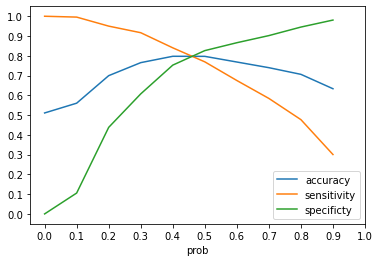

In [121]:
p = cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificty'])
p.set_xticks(np.arange(0, 1.1, 0.1))
p.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [165]:
### we have got the optimal value aroung 0.47

In [166]:
y_train_pred_final["Final Predicted"]= y_train_pred_final.Converted_Prob.map(lambda x : 1 if x>0.47 else 0)

In [167]:
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Predicted,Lead_Score
0,0,0.185151,1,1,0,0,0,0,0,0,0,0,0,18.52
1,0,0.135024,1,1,0,0,0,0,0,0,0,0,0,13.50
2,1,0.247204,1,1,1,0,0,0,0,0,0,0,0,24.72
3,0,0.334283,1,1,1,1,0,0,0,0,0,0,0,33.43
4,0,0.192593,1,1,0,0,0,0,0,0,0,0,0,19.26


#### Lets make confusion matrix based on the final predicted cutoff

In [168]:
cm_final=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final["Final Predicted"])
cm_final

array([[1254,  299],
       [ 335, 1286]], dtype=int64)

In [169]:
total_final=sum(sum(cm_final))
accuracy_final = (cm_final[0,0]+cm_final[1,1])/total_final
specificity_final = cm_final[0,0]/(cm_final[0,0]+cm_final[0,1])
sensitivity_final = cm_final[1,1]/(cm_final[1,0]+cm_final[1,1])

In [170]:
print("Accuracy : ",accuracy_final)
print("Specificity : ",specificity_final)
print("Sensitvity : ",sensitivity_final)

Accuracy :  0.800252047889099
Specificity :  0.8074694140373471
Sensitvity :  0.7933374460209747


In [171]:
precision = cm_final[1,1]/(cm_final[0,1]+cm_final[1,1])
recall = cm_final[1,1]/(cm_final[1,0]+cm_final[1,1])

In [172]:
print("Precision : ",precision)
print("Recall : ",recall)

Precision :  0.8113564668769716
Recall :  0.7933374460209747


In [173]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_pred_final.Converted,y_train_pred_final["Final Predicted"])

0.8113564668769716

In [174]:
recall_score(y_train_pred_final.Converted,y_train_pred_final["Final Predicted"])

0.7933374460209747

In [175]:
### Precision and Recall tradeoff

In [176]:
from sklearn.metrics import precision_recall_curve

In [177]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

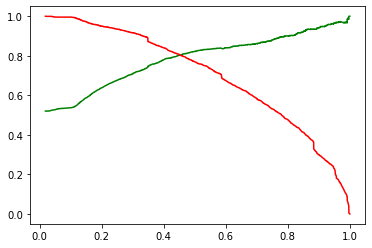

In [178]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

In [179]:
## Adding lead score column to the dataframe

In [180]:
y_train_pred_final["Lead_Score"] = y_train_pred_final.Converted_Prob.map(lambda x:round(x*100,2))

In [181]:
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Predicted,Lead_Score
0,0,0.185151,1,1,0,0,0,0,0,0,0,0,0,18.52
1,0,0.135024,1,1,0,0,0,0,0,0,0,0,0,13.50
2,1,0.247204,1,1,1,0,0,0,0,0,0,0,0,24.72
3,0,0.334283,1,1,1,1,0,0,0,0,0,0,0,33.43
4,0,0.192593,1,1,0,0,0,0,0,0,0,0,0,19.26


## So we are finalising the cutoff as 0.47

## Predictions on the test set

In [182]:
y_test_pred = res4.predict(X_test_sm)

In [183]:
y_test_pred[:10]

4164    0.266142
353     0.202790
647     0.883448
4176    0.981265
564     0.163276
2652    0.889807
2408    0.041491
3222    0.189170
3312    0.301501
1722    0.259524
dtype: float64

In [184]:
y_test_pred = pd.DataFrame(y_test_pred)

In [185]:
y_test_pred.head()

,0
4164,0.266142
353,0.202790
647,0.883448
4176,0.981265
564,0.163276


In [186]:
y_test = pd.DataFrame(y_test)

In [187]:
y_test.head()

,Converted
0,0
1,0
2,1
3,1
4,0


In [188]:
y_test.reset_index(drop=True,inplace=True)
y_test_pred.reset_index(drop=True,inplace=True)

In [189]:
y_pred_final = pd.concat([y_test,y_test_pred],axis=1)

In [190]:
y_pred_final.head()

,Converted,0
0,0,0.266142
1,0,0.202790
2,1,0.883448
3,1,0.981265
4,0,0.163276


In [191]:
y_pred_final["Converted_Prob"]=y_pred_final[0]

In [192]:
y_pred_final.head()

,Converted,0,Converted_Prob
0,0,0.266142,0.266142
1,0,0.202790,0.202790
2,1,0.883448,0.883448
3,1,0.981265,0.981265
4,0,0.163276,0.163276


In [193]:
y_pred_final.drop(0,axis=1,inplace=True)

In [194]:
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.266142
1,0,0.202790
2,1,0.883448
3,1,0.981265
4,0,0.163276


In [195]:
## make predictions using the cutoff

In [196]:
y_pred_final["Final Predicted"]= y_pred_final.Converted_Prob.map(lambda x : 1 if x>0.47 else 0)

In [197]:
y_pred_final.head()

,Converted,Converted_Prob,Final Predicted
0,0,0.266142,0
1,0,0.202790,0
2,1,0.883448,1
3,1,0.981265,1
4,0,0.163276,0


## lets make confusion matrix and calculate accuracy,specificity and sensitivity

In [198]:
y_cm_final=confusion_matrix(y_pred_final.Converted,y_pred_final["Final Predicted"])
y_cm_final

array([[525, 141],
       [148, 547]], dtype=int64)

In [199]:
total_final=sum(sum(y_cm_final))
accuracy_final = (y_cm_final[0,0]+y_cm_final[1,1])/total_final
specificity_final = y_cm_final[0,0]/(y_cm_final[0,0]+y_cm_final[0,1])
sensitivity_final = y_cm_final[1,1]/(y_cm_final[1,0]+y_cm_final[1,1])

In [200]:
print("Accuracy : ",accuracy_final)
print("Specificity : ",specificity_final)
print("Sensitvity : ",sensitivity_final)

Accuracy :  0.7876561351947098
Specificity :  0.7882882882882883
Sensitvity :  0.7870503597122303


In [201]:
precision = y_cm_final[1,1]/(y_cm_final[0,1]+y_cm_final[1,1])
recall = y_cm_final[1,1]/(y_cm_final[1,0]+y_cm_final[1,1])

In [202]:
print("Precision : ",precision)
print("Recall : ",recall)

Precision :  0.7950581395348837
Recall :  0.7870503597122303


In [203]:
## Adding lead_score column 

In [204]:
y_pred_final["Lead_Score"] = y_pred_final.Converted_Prob.map(lambda x: round(x*100,2)) 

In [205]:
y_pred_final.head()

,Converted,Converted_Prob,Final Predicted,Lead_Score
0,0,0.266142,0,26.61
1,0,0.202790,0,20.28
2,1,0.883448,1,88.34
3,1,0.981265,1,98.13
4,0,0.163276,0,16.33
